# Visualization
1. Population and Income Distribution Preview
2. Victoria SA2 Categories
3. Property positions
4. CBD, School and Train Station Proximity
5. Property Cost Distribution

6. (Line Plot) Historical Income Data

7. (Scatter Plot) Population and property count in SA2
8. Top 10 Increase Suburb
9. Top 10 Affordable and Liveable Suburb

In [2]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import folium

/opt/anaconda3/envs/ads/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


--------
### Population and Income Distribution Preview


In [3]:
SA2_2016_shp = gpd.read_file("../data/raw/external_data/SA2_shape_2016/SA2_2016_AUST.shp")
SA2_2016_shp = SA2_2016_shp[SA2_2016_shp['STE_NAME16'] == 'Victoria']
SA2_population = pd.read_csv("../data/raw/external_data/population.csv", index_col=[0])
SA2_population = SA2_population.rename(columns={ 'SA2 code' : 'SA2_MAIN16'})
SA2_population['SA2_MAIN16'] = SA2_population['SA2_MAIN16'].astype(str)
SA2_income = pd.read_csv("../data/raw/external_data/income_SA2_full.csv", index_col=[0])
SA2_income = SA2_income[['SA2', '2018-19.3']].rename(columns={'SA2' : 'SA2_MAIN16', '2018-19.3': 'income'})
SA2_income['SA2_MAIN16'] = SA2_income['SA2_MAIN16'].astype(str)
SA2_income['income'] = SA2_income['income'].replace('np', np.nan)
SA2_income['income'] = SA2_income['income'].astype(float)
geoJSON = SA2_2016_shp[['SA2_MAIN16', 'geometry']].drop_duplicates('SA2_MAIN16').dropna(how='any').to_json()

Population distribution map

In [ ]:
SA2_population_map = folium.Map(location=[-37.5, 145], tiles="Stamen Terrain", zoom_start=9)

# refer to the folium documentations on more information on how to plot aggregated data.
population_ch = folium.Choropleth(
    geo_data=geoJSON, # geoJSON 
    name='SA2 Population', # name of plot
    data= SA2_population[['SA2_MAIN16', 'ERP 2021']], # data source
    columns=['SA2_MAIN16', 'ERP 2021'], # the columns required
    key_on= 'feature.properties.SA2_MAIN16' , # this is from the geoJSON's properties
    fill_color='Reds', # color scheme
    nan_fill_color='green',
    legend_name='SA2 Population 2021'
)
population_ch.add_to(SA2_population_map)
SA2_population_map.save("../plots/SA2_population_distribution_map.html")
SA2_population_map

Income distribution map

In [ ]:
SA2_income_map = folium.Map(location=[-37.5, 145], tiles="Stamen Terrain", zoom_start=9)

# refer to the folium documentations on more information on how to plot aggregated data.
income_ch = folium.Choropleth(
    geo_data=geoJSON, # geoJSON 
    name='SA2 Income', # name of plot
    data= SA2_income[['SA2_MAIN16', 'income']], # data source
    columns=['SA2_MAIN16', 'income'], # the columns required
    key_on= 'feature.properties.SA2_MAIN16' , # this is from the geoJSON's properties
    fill_color='Reds', # color scheme
    nan_fill_color='green',
    legend_name='SA2 Median Income 2019'
)
income_ch.add_to(SA2_income_map)
SA2_income_map.save("../plots/SA2_income_distribution_map.html")
SA2_income_map

--------------
### Victoria SA2 Categories
Greater Melbourne Red

Rest of Vic. White

In [79]:
SA2_cat = SA2_2016_shp[['SA2_MAIN16', 'GCC_NAME16']].copy()
cat = SA2_cat['GCC_NAME16'].map(lambda x : 1 if x == 'Greater Melbourne' else 0)
SA2_cat['cat'] = cat
SA2_cat.head()

,SA2_MAIN16,GCC_NAME16,cat
578,201011001,Rest of Vic.,0
579,201011002,Rest of Vic.,0
580,201011003,Rest of Vic.,0
581,201011004,Rest of Vic.,0
582,201011005,Rest of Vic.,0


In [ ]:
SA2_cat_map = folium.Map(location=[-37.5, 145], tiles="Stamen Terrain", zoom_start=9)

# refer to the folium documentations on more information on how to plot aggregated data.
cat_ch = folium.Choropleth(
    geo_data=geoJSON, # geoJSON 
    name='SA2 Cat', # name of plot
    data= SA2_cat[['SA2_MAIN16', 'cat']], # data source
    columns=['SA2_MAIN16', 'cat'], # the columns required
    key_on= 'feature.properties.SA2_MAIN16' , # this is from the geoJSON's properties
    fill_color='Blues', # color scheme
    nan_fill_color='green',
    legend_name='SA2 Category Map'
)
cat_ch.add_to(SA2_cat_map)
SA2_cat_map.save("../plots/SA2_cat_map.html")
SA2_cat_map

----------
### Property Positions

In [80]:
# Load data
property_raw = pd.read_json('../data/raw/property_raw.json')
property_raw = property_raw.transpose()
property_raw = property_raw.reset_index(drop=True)

In [ ]:
property_raw_sample = property_raw.sample(n = 200, random_state=30034)

property_map = folium.Map(location=[-37, 145], tiles="Stamen Terrain", zoom_start=8)

def plotPropertyDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.coordinates[0], point.coordinates[1]],
                        radius=5,
                        weight=1,#remove outline
                        popup = point.type,
                        fill_color='red').add_to(property_map)

property_raw_sample.apply(plotPropertyDot, axis=1)
property_map.save("../plots/property_location_map.html")
property_map

---------
### CBD, School and Train Station Proximity
1. CBD Proximity

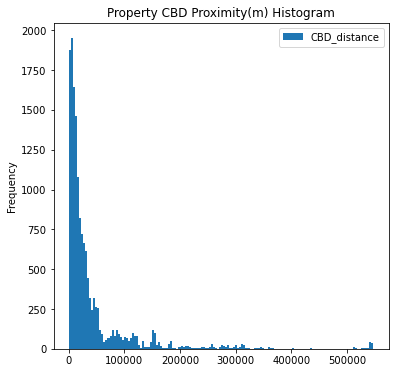

In [15]:
proximity_CBD = pd.read_csv("../data/raw/distance_to_CBD.csv", index_col=[0])
ax_CBD = proximity_CBD.plot.hist(bins=150, 
                                 column='CBD_distance', 
                                 figsize=(6,6), 
                                 title='Property CBD Proximity(m) Histogram',
                                 xlabel = 'Route Distance (m)',
                                 ylabel = 'Frequency')
plt.savefig("../plots/CBD_proximity_hist.jpeg")

2. School Proximity

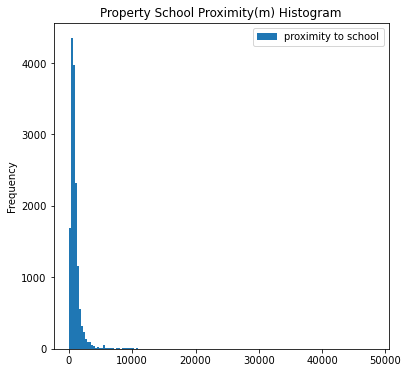

In [18]:
proximity_school = pd.read_csv("../data/raw/properties_shcool_proximity.csv", index_col=[0])
ax_school = proximity_school.plot.hist(bins=150, 
                                      column='proximity to school', 
                                      figsize=(6,6), 
                                      title='Property School Proximity(m) Histogram',
                                      xlabel = 'Route Distance (m)',
                                      ylabel = 'Frequency')
plt.savefig("../plots/school_proximity_hist.jpeg")

2. Train Station Proximity

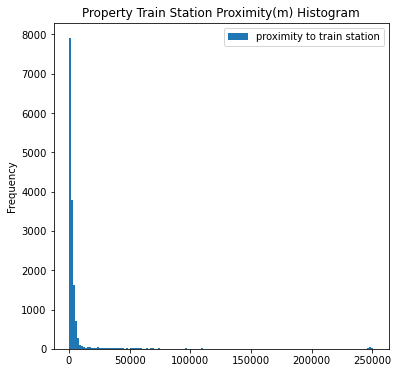

In [19]:
proximity_train= pd.read_csv("../data/raw/properties_train_proximity.csv", index_col=[0])
ax_train = proximity_train.plot.hist(bins=150, 
                                      column='proximity to train station', 
                                      figsize=(6,6), 
                                      title='Property Train Station Proximity(m) Histogram',
                                      xlabel = 'Route Distance (m)',
                                      ylabel = 'Frequency')
plt.savefig("../plots/train_proximity_hist.jpeg")

------
### Property Cost Distribution

In [35]:
property_1 = pd.read_csv("../data/raw/properties_preporcessed_1.csv", index_col=[0])
property_1_plot = property_1[(np.abs(stats.zscore(property_1['cost'])) <2.5)]

Histogram

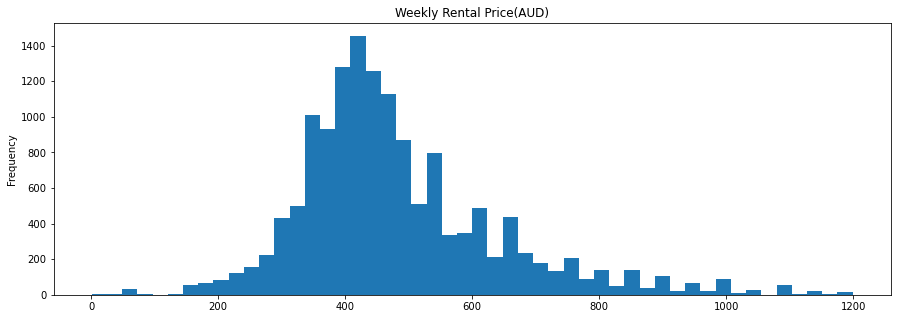

In [41]:
ax_property_cost = property_1_plot['cost'].plot.hist(bins=50, 
                                                      column='cost', 
                                                      figsize=(15,5), 
                                                      title='Weekly Rental Price(AUD)',
                                                      ylabel = 'Frequency')
plt.savefig("../plots/property_rental_cost_hist.jpeg")

Density Curve

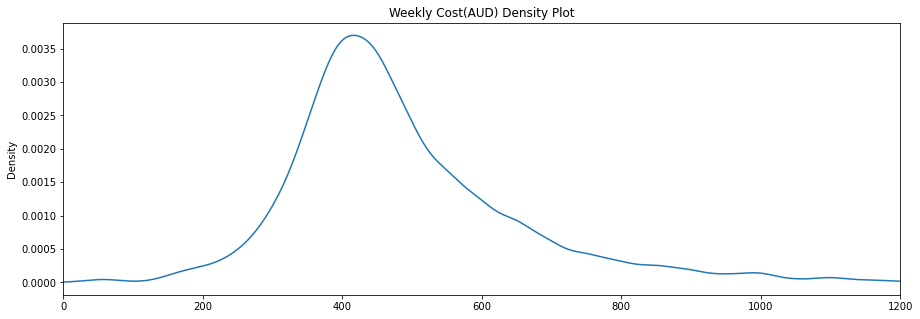

In [54]:
ax_property_cost_density = property_1_plot['cost'].plot.density(figsize=(15,5), 
                                                                xlim=[0, 1200],
                                                                title = 'Weekly Cost(AUD) Density Plot',
                                                                xlabel = 'Weekly Cost($)',
                                                                ylabel = 'Density')
plt.savefig("../plots/property_rental_cost_dens.jpeg")

Normal curve

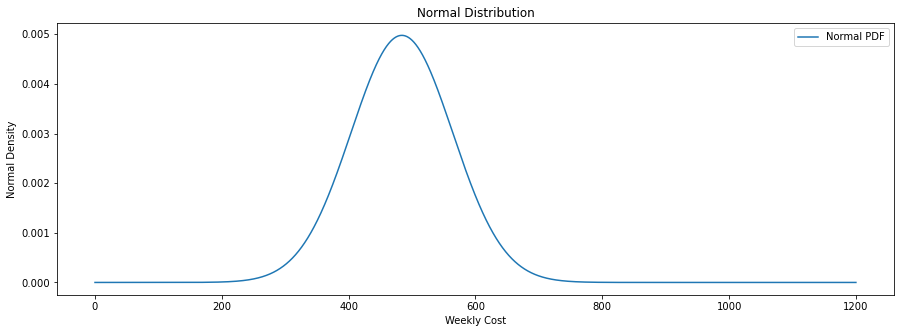

In [56]:
# Plot between -10 and 1200 with .001 steps.
x_axis = np.arange(0, 1200, 0.1)
mean = property_1_plot['cost'].mean()
std = property_1_plot['cost'].std()/2
ax_normal = plt.figure(figsize=(15,5))
plt.title('Normal Distribution')
plt.xlabel('Weekly Cost')
plt.ylabel('Normal Density')
plt.plot(x_axis, stats.norm.pdf(x_axis,mean,std))
plt.legend(["Normal PDF"])
plt.savefig("../plots/normal.jpeg")
plt.show()

--------------
### Historical Income Data

In [59]:
income_df = pd.read_csv('../data/raw/income_for_suburb.csv')
income_df.head()

,LOC_NAME,2011-12.3,2012-13.3,2013-14.3,2014-15.3,2015-16.3,2016-17.3,2017-18.3,2018-19.3,2019,2020,2021,2022,2023,2024,2025
0,Abbotsford,50034.0,50558.0,51419.0,53987.0,57501.0,58359.0,61476.0,64090.0,66409.949224,68813.876673,71304.822215,73885.935758,76560.481231,79331.840710,82203.518699
1,Aberfeldie,50458.0,52097.0,53037.0,54683.0,56381.0,56597.0,59116.0,61204.0,62920.085721,64684.288398,66497.957172,68362.479013,70279.279779,72249.825306,74275.622534
2,Aintree,38711.0,39709.0,40111.0,38717.0,39657.0,43924.0,48697.0,51869.0,54142.564367,56515.785463,58993.031525,61578.862259,64278.037238,67095.524658,70036.510488
3,Airport West,45090.0,46837.0,48941.0,50094.0,52329.0,53575.0,55912.0,58506.0,60726.452293,63031.176428,65423.370737,67906.354937,70483.574736,73158.606615,75935.162795
4,Albanvale,38444.0,40266.0,40038.0,41211.0,41238.0,41394.0,43026.0,44383.0,45311.439040,46259.299910,47226.988890,48214.920761,49223.518980,50253.215862,51304.452765


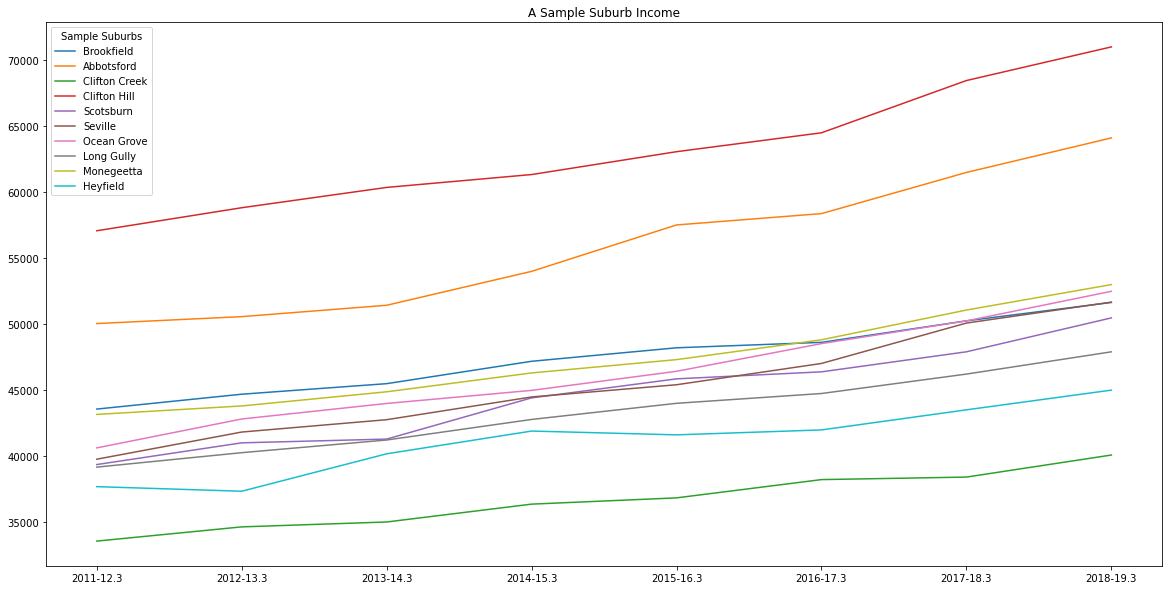

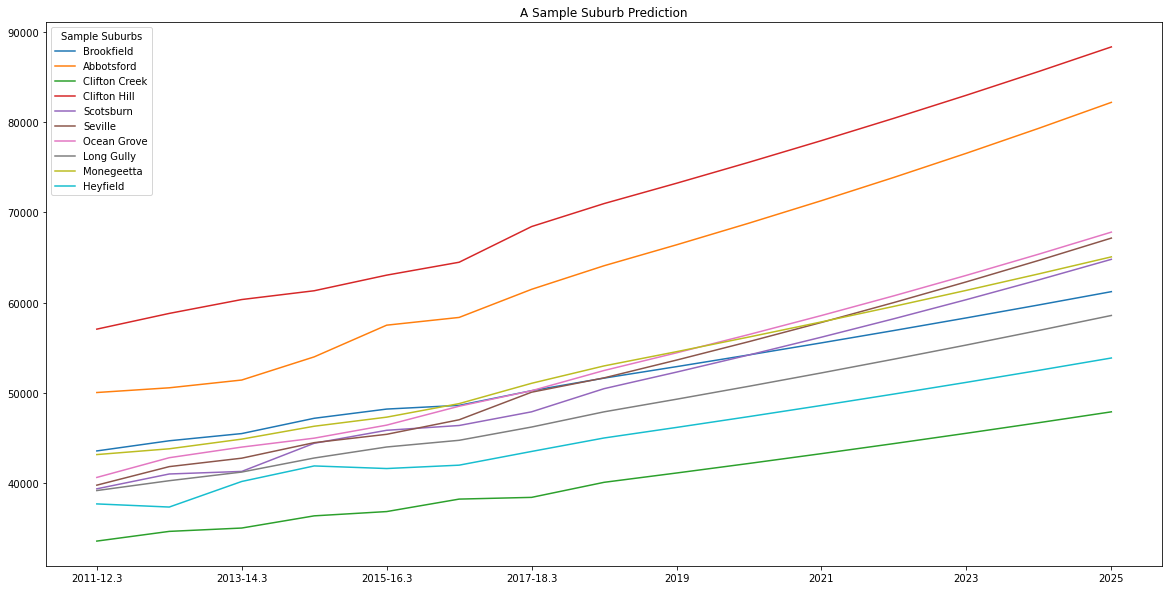

In [60]:
income_df_sample = income_df.sample(n=10, random_state=150)
income_df_sample = income_df_sample.set_index(keys='LOC_NAME', drop=True).transpose()
ax1 = income_df_sample.iloc[:8,:].plot(kind= 'line', title='A Sample Suburb Income', figsize=(20, 10)).legend(loc='upper left')
ax2 = income_df_sample.plot(kind= 'line', title='A Sample Suburb Prediction', figsize=(20, 10)).legend(loc='upper left')
ax1.set_title('Sample Suburbs')
ax2.set_title('Sample Suburbs')
ax1.get_figure().savefig("../plots/income_sample_1.jpeg")
ax2.get_figure().savefig("../plots/income_sample_2.jpeg")

------------
### Population and Preperty Count

In [85]:
property1 = pd.read_csv("../data/raw/properties_preporcessed_1.csv", index_col=[0])[['name', 'SA2_MAIN16']]
population_sa2 = pd.read_csv("../data/raw/external_data/population.csv", index_col=[0])
population_sa2 = population_sa2[['SA2 code', 'SA2 name', 'ERP 2021','density 2021 persons/km2']]
property_agg = property1.groupby('SA2_MAIN16', as_index=False).count().rename(columns={'SA2_MAIN16' : 'SA2 code', 'name' : 'property_count'})

In [86]:
pop_count = pd.merge(property_agg, population_sa2, on='SA2 code', how='left')
pop_count = pop_count[(np.abs(stats.zscore(pop_count['property_count'])) <2.5)]
pop_count = pop_count[(np.abs(stats.zscore(pop_count['ERP 2021'])) < 5)]

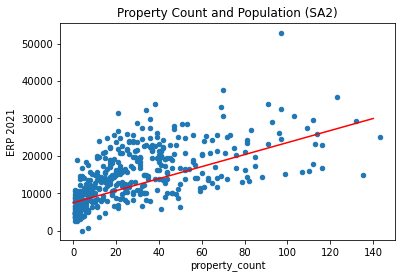

In [87]:
ax3 = pop_count.plot(kind='scatter', title='Property Count and Population (SA2)', y='ERP 2021', x='property_count')
ax3.add_line(line=plt.Line2D(xdata=[0, 140], ydata=[7500, 30000], color='red'))
ax3.get_figure().savefig("../plots/population_property_scatter.jpeg")

In [88]:
pop_count[['property_count', 'ERP 2021']].corr()

,property_count,ERP 2021
property_count,1.000000,0.606772
ERP 2021,0.606772,1.000000


-----------
### Top 10 Increase Suburb

In [117]:
suburb_shp = gpd.read_file('../data/raw/external_data/vic_localities/vic_localities.shp')
top_10_increase = pd.read_csv("../data/curated/top_10_suburbs.csv", index_col=[0])
top_10_increase_shp = suburb_shp[suburb_shp['LOC_NAME'].map(lambda x : x in top_10_increase['Suburbs with highest average growth rate'].to_list())]
geoJSON_2 = top_10_increase_shp[['LOC_NAME', 'geometry']].to_json()

In [118]:
top_10_increase['rank'] = range(1, 11)

In [119]:
top_10_increase_data = top_10_increase[['Suburbs with highest average growth rate', 'rank']]
top_10_increase_data = top_10_increase_data.rename(columns={'Suburbs with highest average growth rate' : 'LOC_NAME'})
top_10_increase_data

,LOC_NAME,rank
1,Allansford,1
2,Kadnook,2
3,Natimuk,3
4,Nichols Point,4
5,Bundalong,5
6,Nhill,6
7,Pyramid Hill,7
8,South Kingsville,8
9,Penshurst,9
10,Boort,10


In [126]:
top_10_increase_map = folium.Map(location=[-37.5, 145], tiles="Stamen Terrain", zoom_start=9)

# refer to the folium documentations on more information on how to plot aggregated data.
top_10_increase_ch = folium.Choropleth(
    geo_data=geoJSON_2, # geoJSON 
    name='top_10_increase', # name of plot
    data= top_10_increase_data, # data source
    columns=['LOC_NAME', 'rank'], # the columns required
    key_on= 'feature.properties.LOC_NAME' , # this is from the geoJSON's properties
    fill_color='Reds', # color scheme
    nan_fill_color='green',
    legend_name='SA2 Category Map'
)
top_10_increase_ch.add_to(top_10_increase_map)
top_10_increase_map.save("../plots/top_10_increase_map.html")
top_10_increase_map